In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles
from owslib.wmts import WebMapTileService
from owslib.wms import WebMapService

from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches

import numpy as np

import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

In [2]:
%matplotlib inline

In [96]:
URL = 'http://services.ga.gov.au/gis/services/NM_Hydrology_and_Marine_Lines/MapServer/WMSServer?'

wms = WebMapService(URL)

print(list(wms.contents) )

print(wms)


['Watercourses_All_Rivers_Watercourse_Lines', 'Watercourses_All_Rivers_Connectors', 'Watercourses_Major_Rivers_Scale_5Million_to_300000', 'Watercourses_Major_Rivers_National_Scale_to_5Million', 'Levees', 'Spillways', 'Rapid_Lines', 'Dam_Walls', 'Canal_Lines', 'Marine_Infrastructure_Lines', 'Watercourses_All_Rivers_Labels', 'Watercourses_Major_Rivers_Scale_5Million_to_300000_Labels', 'Watercourses_Major_Rivers_Scale_10Million_to_5Million_Labels', 'Dam_Walls_Labels']


In [97]:
wms.identification.title

'Dynamic National Map Hydrology and Marine - Lines'

In [82]:
print(wms.contents)

OrderedDict([('Image', <owslib.map.wms111.ContentMetadata object at 0x000001A2812B0F98>), ('Footprint', <owslib.map.wms111.ContentMetadata object at 0x000001A2812B09B0>), ('Boundary', <owslib.map.wms111.ContentMetadata object at 0x000001A2FF740748>)])


In [83]:
list(wms.contents)

['Image', 'Footprint', 'Boundary']

In [84]:
list(wms.contents.keys())

['Image', 'Footprint', 'Boundary']

In [71]:
print(wms.contents['Shoreline'])

Layer Name: Shoreline Title: Shoreline


In [72]:
wms['Shoreline'].title

'Shoreline'

In [73]:
wms['Shoreline'].crsOptions

['CRS:84',
 'EPSG:28355',
 'EPSG:28349',
 'EPSG:28348',
 'EPSG:28352',
 'EPSG:32755',
 'EPSG:32751',
 'EPSG:28351',
 'EPSG:28354',
 'EPSG:32756',
 'EPSG:32750',
 'EPSG:32757',
 'EPSG:3032',
 'EPSG:3857',
 'EPSG:32753',
 'EPSG:32758',
 'EPSG:28356',
 'EPSG:4326',
 'EPSG:28358',
 'EPSG:32749',
 'EPSG:102100',
 'EPSG:28357',
 'EPSG:28350',
 'EPSG:32748',
 'EPSG:4283',
 'EPSG:28353',
 'EPSG:32754',
 'EPSG:32752',
 'EPSG:3031']

In [74]:
wms['Shoreline'].styles

{'default': {'legend': 'http://services.ga.gov.au/site_1/rest/directories/capabilities/Shoreline_WM/Shoreline_WM_Shoreline_Legend.png',
  'title': 'Shoreline'}}

In [85]:
water_extent = (110, -50, 160, -10)
layer = 'Image'
img = wms.getmap(   layers=[layer],
                     styles=['default'],
                     srs='EPSG:4326',
                     bbox=water_extent,
                     size=(300, 250),
                     format='image/jpeg',
                     )
out = open('qld_test.jpg', 'wb')
out.write(img.read())
out.close()

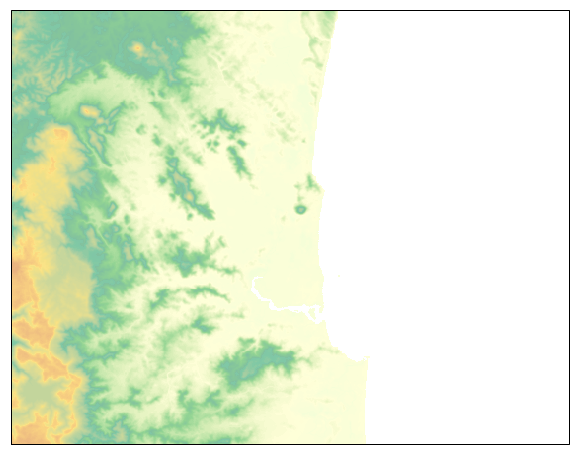

In [89]:
fig = plt.figure(figsize=(10,10) )

ax = fig.add_subplot(1, 1, 1, 
                     projection=ccrs.PlateCarree(), )

water_extent = (152.85, 153.3, -26.75, -26.4)
ax.set_extent(water_extent)

URL = 'http://services.ga.gov.au/gis/services/DEM_SRTM_1Second_Hydro_Enforced/MapServer/WmsServer?'
layer= 'Image'
ax.add_wms(URL, [layer], alpha=0.5)


plt.show()

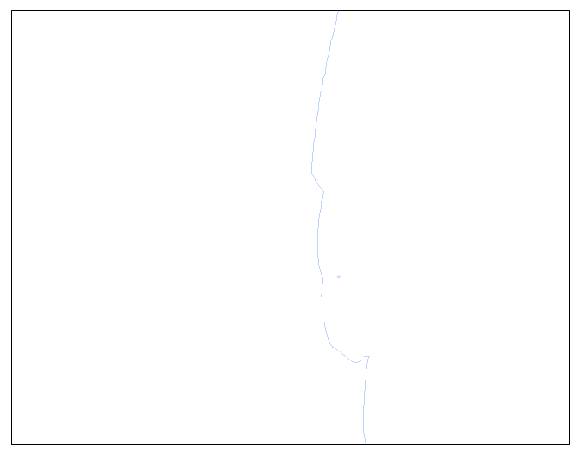

In [90]:
fig = plt.figure(figsize=(10,10) )

ax = fig.add_subplot(1, 1, 1, 
                     projection=ccrs.PlateCarree(), )

water_extent = (152.85, 153.3, -26.75, -26.4)
ax.set_extent(water_extent)

URL = 'http://services.ga.gov.au/site_1/services/Shoreline_WM/MapServer/WmsServer?'
layer= 'Shoreline'
ax.add_wms(URL, [layer], alpha=1)


plt.show()

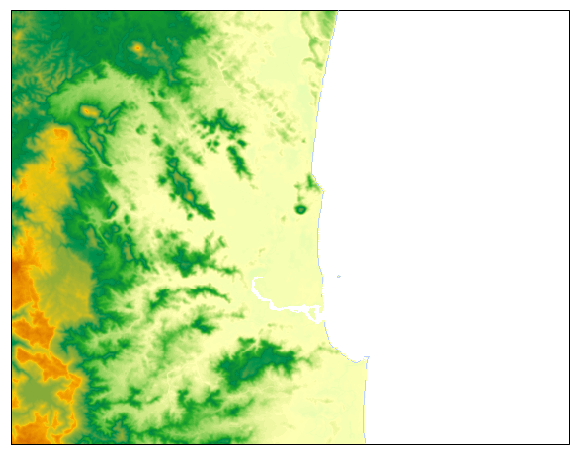

In [93]:
fig = plt.figure(figsize=(10,10) )

ax = fig.add_subplot(1, 1, 1, 
                     projection=ccrs.PlateCarree(), )

water_extent = (152.85, 153.3, -26.75, -26.4)
ax.set_extent(water_extent)

URL = 'http://services.ga.gov.au/site_1/services/Shoreline_WM/MapServer/WmsServer?'
layer= 'Shoreline'
ax.add_wms(URL, [layer], alpha=1, zorder=5)

URL = 'http://services.ga.gov.au/gis/services/DEM_SRTM_1Second_Hydro_Enforced/MapServer/WmsServer?'
layer= 'Image'
ax.add_wms(URL, [layer], alpha=1)


plt.show()

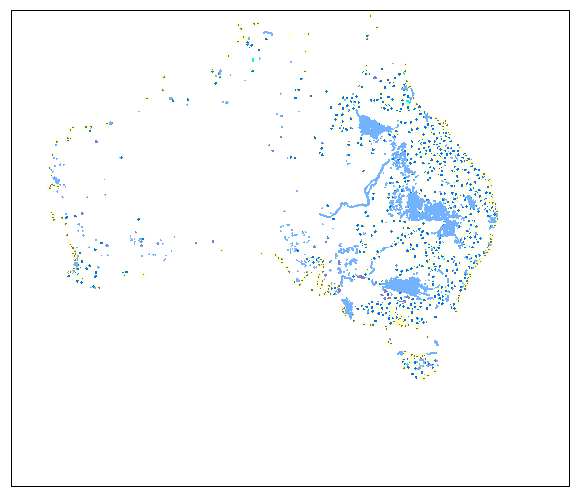

In [98]:
fig = plt.figure(figsize=(10,10) )

ax = fig.add_subplot(1, 1, 1, 
                     projection=ccrs.PlateCarree(), )

water_extent = (110, 160, -50, -10)
ax.set_extent(water_extent)

URL = 'http://services.ga.gov.au/gis/services/NM_Hydrology_and_Marine_Lines/MapServer/WMSServer?'
layer= 'Watercourses_All_Rivers_Watercourse_Lines'
ax.add_wms(URL, list(wms.contents), alpha=1.0)


plt.show()

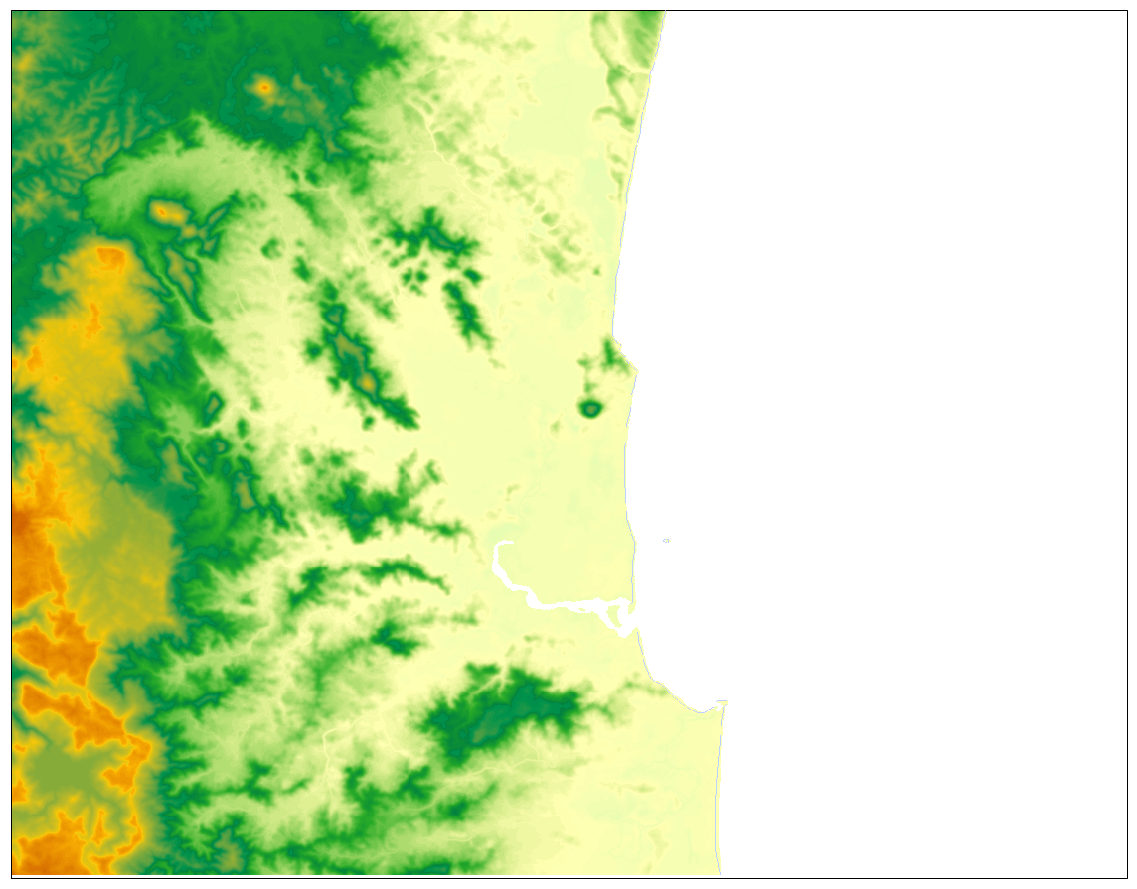

In [99]:
fig = plt.figure(figsize=(20,20) )

ax = fig.add_subplot(1, 1, 1, 
                     projection=ccrs.PlateCarree(), )

water_extent = (152.85, 153.3, -26.75, -26.4)
ax.set_extent(water_extent)

URL = 'http://services.ga.gov.au/site_1/services/Shoreline_WM/MapServer/WmsServer?'
layer= 'Shoreline'
ax.add_wms(URL, [layer], alpha=1, zorder=5)

URL = 'http://services.ga.gov.au/gis/services/DEM_SRTM_1Second_Hydro_Enforced/MapServer/WmsServer?'
layer= 'Image'
ax.add_wms(URL, [layer], alpha=1)


plt.show()

In [104]:
qw_file = 'd:/water/qw/Watercourse_areas.shp'
qw = gpd.read_file(qw_file)
qw.head()

,FEATURETYP,TYPE,NAME,PERENNIALI,HIERARCHY,FEATUREREL,FEATURESOU,ATTRIBUTER,ATTRIBUTES,PLANIMETRI,TEXTNOTE,DIMENSION,INDIGENOUS,ALTERNATEN,SHAPE_Leng,SHAPE_Area,geometry
0,Watercourse Area,2,None,Perennial,Minor,2009-06-01,Spot Satellite Imagery_2pt5m_Zone 54,2009-06-01,Spot Satellite Imagery_2pt5m_Zone 54,12,None,2.292257e+05,None,None,0.070821,1.901069e-05,POLYGON ((142.0889100000001 -11.74123549999996...
1,Watercourse Area,2,None,Perennial,Minor,2009-06-01,Spot Satellite Imagery_2pt5m_Zone 54,2009-06-01,Spot Satellite Imagery_2pt5m_Zone 54,12,None,1.416569e+04,None,None,0.008439,1.174978e-06,POLYGON ((142.0732155000001 -11.78887799999995...
2,Watercourse Area,2,Skardon River,Perennial,Major,2009-06-01,Spot Satellite Imagery_2pt5m_Zone 54,2013-01-01,Qld_Place Names Database,12,None,8.813706e+06,None,None,0.410026,7.309540e-04,POLYGON ((142.0062405000001 -11.75866649999995...
3,Watercourse Area,2,None,Perennial,Minor,2009-06-01,Spot Satellite Imagery_2pt5m_Zone 54,2009-06-01,Spot Satellite Imagery_2pt5m_Zone 54,12,None,9.408075e+03,None,None,0.007488,7.810069e-07,"POLYGON ((142.1298335 -12.01514599999996, 142...."
4,Watercourse Area,2,None,Perennial,Minor,2009-06-01,Spot Satellite Imagery_2pt5m_Zone 54,2009-06-01,Spot Satellite Imagery_2pt5m_Zone 54,12,None,2.353035e+05,None,None,0.068580,1.957267e-05,"POLYGON ((141.9394935 -12.56058599999994, 141...."


In [105]:
pd.value_counts(qw['NAME'].values)

Cooper Creek            154
Mitchell River          136
Archer River             97
Diamantina River         93
Sandy Creek              73
Thomson River            73
Georgina River           59
Barcoo River             57
Dawson River             54
Warrego River            45
Dumaresq River           45
Brisbane River           44
Pike Creek               41
Holroyd River            41
Palmer River             40
Gunpowder Creek          39
Severn River             36
Haughton River           35
Balonne River            33
Bulloo River             33
Lagoon Creek             32
Condamine River          32
Fiery Creek              30
Eastern Creek            30
Emu Creek                29
Eyre Creek               29
Weir River               28
Mistake Creek            27
Coleman River            27
Jardine River            26
                       ... 
Hurricane Creek           1
Forty Nine Waterhole      1
Kelly Creek               1
St Pauls Creek            1
Stoodleigh Creek    

In [109]:
water_sites_file = 'd:/water/Cleaned Site Details.xlsx'

water_df  = pd.read_excel(water_sites_file, sheet_name='Sheet1',)

geometry = [Point(xy) for xy in zip(water_df['longitude'], water_df['latitude'])]
    
crs = {'init': 'epsg:4326'}
gwater = gpd.GeoDataFrame(water_df, crs=crs, geometry=geometry)

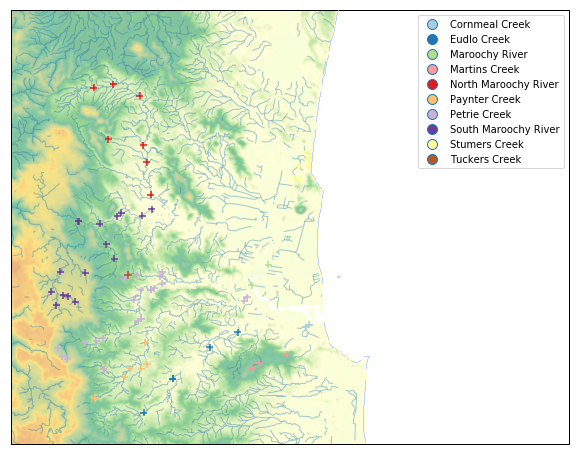

In [111]:
fig = plt.figure(figsize=(10,10) )

water_extent = (152.85, 153.3, -26.75, -26.4)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(water_extent, crs=ccrs.PlateCarree())

water_shpfile = 'd:/water/waterways/QLD_WWAYS_WWBW_STREAM_L.shp'
wg = gpd.read_file(water_shpfile)
wg.plot(ax=ax, linewidth=1, alpha=0.4)


URL = 'http://services.ga.gov.au/site_1/services/Shoreline_WM/MapServer/WmsServer?'
layer= 'Shoreline'
ax.add_wms(URL, [layer], alpha=1, zorder=5)

URL = 'http://services.ga.gov.au/gis/services/DEM_SRTM_1Second_Hydro_Enforced/MapServer/WmsServer?'
layer= 'Image'
ax.add_wms(URL, [layer], alpha=0.5)

gwater.plot(ax=ax, 
         marker='+', 
        column='Waterway', 
        cmap='Paired', 
        markersize=50, 
        zorder=5, 
        legend=True,
        categorical=True,
)

plt.show()

In [114]:
places_shpfile = 'd:/water/places/Place_names_gazetteer.shp'
places = gpd.read_file(places_shpfile)

In [115]:
places.head()

,REF_NO,PLACE_NAME,ALT_NAME,TYPE,DESCRIPTIO,STATUS,CURRENCY,GAZETTED_D,GAZETTE_PA,PLAN_NO,...,LGA_NAME,COMMENTS,LONGITUDE,LATITUDE,LONGITUDE_,LATITUDE_D,ORIGIN,HISTORY,LINKS,geometry
0,47290,The Narrows,None,LOCB,Locality Bounded,Y,Y,2010-06-25,624.0,QPN1160,...,Gladstone Regional,Named and bounded by the Minister for Natural ...,"150° 57' 53"" E","23° 36' 47"" S",150.964996,-23.613056,None,None,None,POINT (150.964996 -23.61305599999997)
1,47291,Turkey Beach,None,LOCB,Locality Bounded,Y,Y,2010-06-25,624.0,QPN1160,...,Gladstone Regional,Named and bounded by the Minister for Natural ...,"151° 39' 19"" E","24° 05' 00"" S",151.655548,-24.083334,None,None,None,POINT (151.6555480000001 -24.08333399999998)
2,47293,Wooderson,None,LOCB,Locality Bounded,Y,Y,2010-06-25,624.0,QPN1160,...,Gladstone Regional,Named and bounded by the Minister for Natural ...,"151° 05' 16"" E","24° 06' 15"" S",151.088043,-24.104168,None,None,None,POINT (151.0880430000001 -24.10416799999996)
3,47296,Glen Eden,None,SUB,Suburb,Y,Y,2010-06-25,624.0,QPN1160,...,Gladstone Regional,Suburb named and bounded by Governor in Counci...,"151° 16' 01"" E","23° 54' 06"" S",151.267212,-23.901943,None,None,None,POINT (151.2672119140001 -23.90194320699993)
4,47342,Grass Tree Creek,None,STRM,Watercourse,Y,Y,None,0.0,None,...,Sunshine Coast Regional,None,"152° 56' 23"" E","26° 27' 28"" S",152.939728,-26.458055,None,None,None,POINT (152.9397277830001 -26.45805549599993)


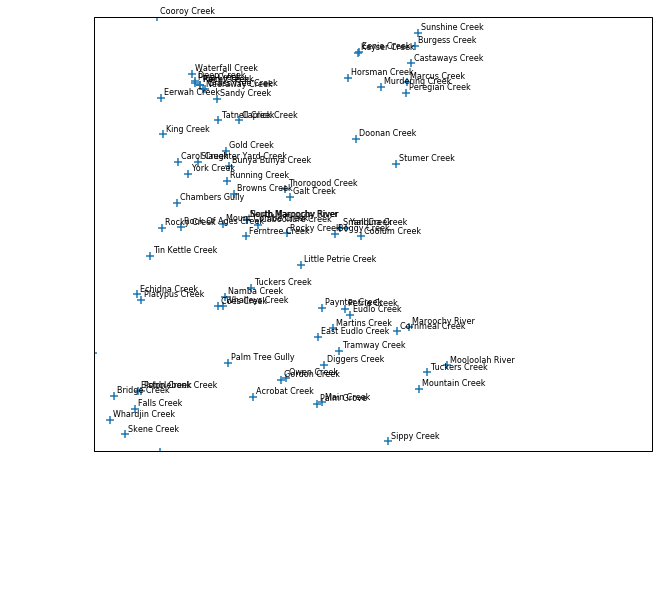

In [120]:
fig = plt.figure(figsize=(10,10) )

water_extent = (152.85, 153.3, -26.75, -26.4)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(water_extent, crs=ccrs.PlateCarree())

stream_places = places[places['TYPE']=='STRM']
stream_places.plot(ax=ax, marker='+', markersize=50, )

stream_places = places[places['TYPE']=='STRM']

for x, y, label in zip(stream_places.geometry.x, 
                       stream_places.geometry.y, 
                       stream_places.PLACE_NAME):
    ax.annotate(label, 
                xy=(x, y), 
                xytext=(3, 3), 
                textcoords="offset points",
                fontsize=8,)

plt.show()

In [119]:
places['TYPE'].unique()

array(['LOCB', 'SUB', 'STRM', 'WTRH', 'BAY', 'IS', 'ROCK', 'CNTY', 'PRSH',
       'WRFL', 'MT', 'LOCU', 'POPL', 'BANK', 'CAPE', 'PT', 'HILL', 'LAGN',
       'PEAK', 'PASG', 'FORD', 'ISX', 'LAKE', 'PORT', 'MTS', 'FRST',
       'GORG', 'INLT', 'CAY', 'ISG', 'NBHD', 'CLIF', 'DUNE', 'SWP', 'PLN',
       'LOOK', 'BAR', 'PL', 'RES', 'CHAN', 'RSID', 'REEF', 'JUNC', 'BCH',
       'CAVE', 'LNDG', 'SPRG', 'PASS', 'PARK', 'DI', 'SHOL', 'VAL', 'HBR',
       'SND', 'SPIT', 'RCH', 'GULF', 'RDGE', 'PAN', 'RAP', 'SITE', 'POCK',
       'PEAX', 'CNR', 'AF', 'ENTR', 'ANCH', 'PEN', 'SCRB', 'SOAK', 'WEIR',
       'RSTA', 'DAM', 'PAR', 'RH', 'WOOD', 'STAT', 'ISTH', 'RESV', 'PAST',
       'DSRT', 'MTX'], dtype=object)

In [ ]:
'''
Place Type abbreviations: 
AF Airfield, Landing Ground 
ANCH Anchorage 
BANK Bank - Marine 
BAR Bar 
BAY Bay 
BCH Beach 
CAPE Cape 
CAVE Cave 
CAY Cay 
CHAN Channel 
CLIF Cliff, Bluff, Precipice 
CNR Corner 
CNTY County 
COVE Cove, Inlet 
DAM Dam 
DI District 
DUNE Mound, Ridge, Hill or Blow of drifted sand 
DSRT Desert 
ENTR Entrance 
FORD Ford 
FRST State Forest, Forest Reserve 
GORG Gorge, Ravine, Chasm, Canyon 
GULF Gulf 
GLLY Gully 
HBR Harbour, Haven 
HILL Hill, Butte, Knoll, Knob 
INLT Inlet 
IS Island 
ISX Island - feature appears absent 
ISG Island Group 
ISTH Isthmus 
LAGN Lagoon 
LAKE Lake, Billabong 
LNDG Landing Place 
LOCB Locality Bounded 
LOCU Locality Unbounded, Pocket 
LOOK Lookout 
MT Mountain 
MTX Mountain - feature no longer exists 
MTS Mountains, Range 
NBHD Neighbourhood 
PAN - Pan 
PAR Park 
PARK National Park, Resources, Reserve, Conservation Park 
PASG Passage 
PASS Pass 
PAST Pastoral district 
PEAK Mountain Peak 
PEAX Mountain Peak - feature no longer exists 
PEN Peninsula 
PL Plateau, Tableland 
PLN Flat, Plain, Downs, Prairie 
POCK Pocket 
POND Pond (no longer used - refer WTRH) 
POOL Pool (no longer used - refer WTRH) 
POPL City, Town, Township 
POPX City, Town, Township - feature appears absent 
PORT Port 
PRSH Parish 
PT Point 
RAP Rapids 
RAV Ravine, Gorge (no longer in use - refer GORG) 
RCH Reach 
REEF Reef 
RDGE Ridge, Spur 
RES Reservoir 
RH Rockhole, GnammaHole 
ROCK Rock 
RSID Siding 
RSTN Rail Station 
SCRB Scrub 
SHOL Shoal 
SITE Historical site 
SND Sound 
SOAK Soak, Native Well 
SPIT Sand spit 
SPRG Spring 
SPUR Spur (no longer used - refer RDGE) 
STAT State 
STR Strait (no longer used - refer PASS) 
STRM Watercourse 
SUB Suburb 
SWP Swamp, Marsh 
VAL Valley 
WEIR Weir 
WOOD Wood, Scrub, Thicket 
WRFL Waterfall, Cataract 
WTRH Waterhole, Pool. 
'''